<a href="https://colab.research.google.com/github/NopalChoir/datamining/blob/main/Tugas5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
pip install openpyxl

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [13]:
data = pd.read_excel("./dataset dailycap Ethereum.xlsx")

In [15]:
X = data[['Open','High','Low','Close','Volume']]
y = data['Adj Close']

In [16]:
x = data.iloc[:, [2, 3]].values
y = data.iloc[:, -1].values

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [21]:
y_pred = classifier.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]


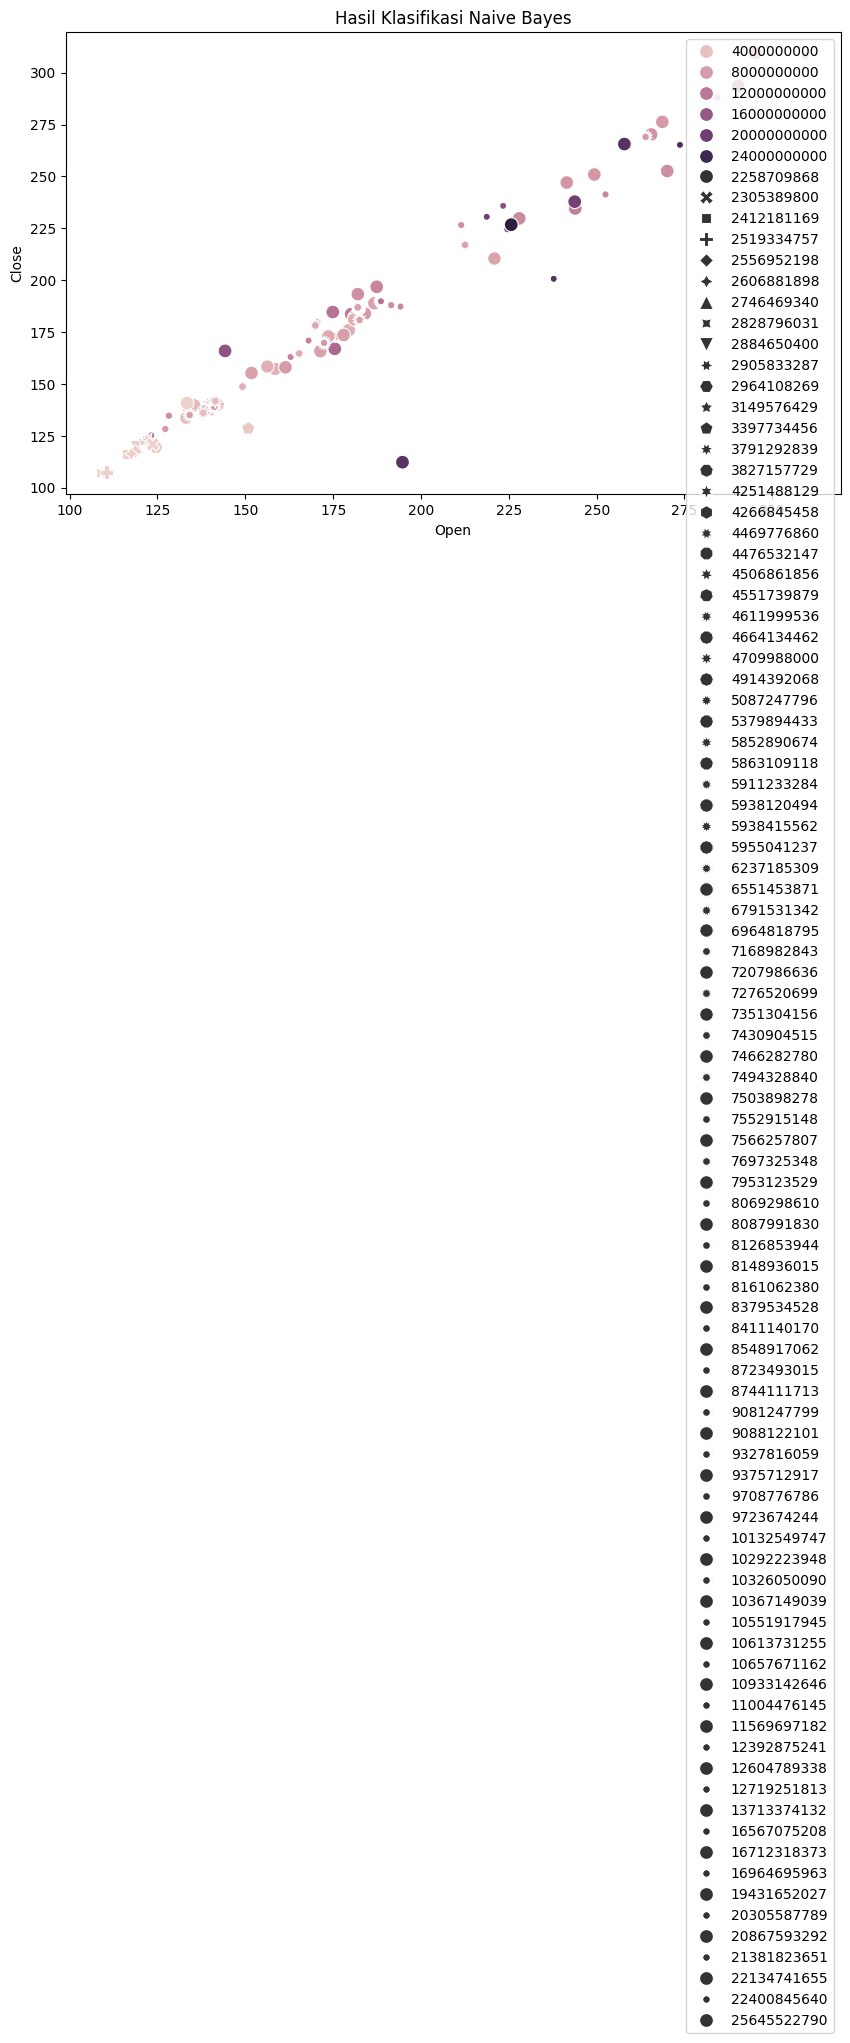

In [27]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['Open'], y=X_test['Close'], hue=y_pred, style=y_test, s=100)
plt.title('Hasil Klasifikasi Naive Bayes')
plt.xlabel('Open')
plt.ylabel('Close')
plt.legend()
plt.show()

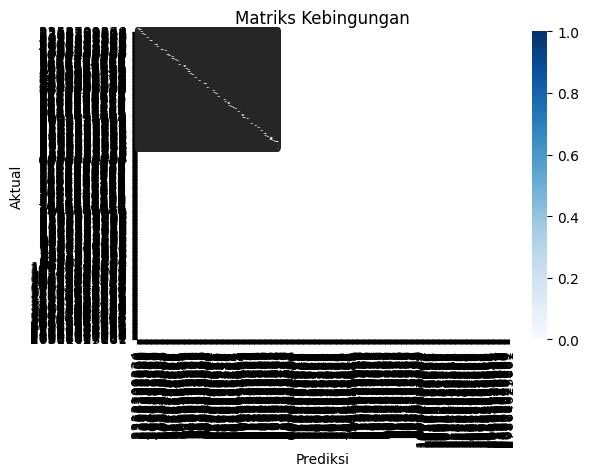

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Matriks Kebingungan')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()